9


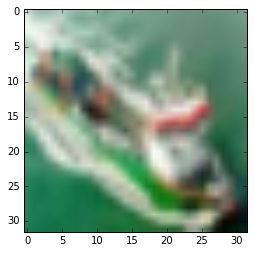

In [11]:
%matplotlib inline
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.learn as skflow
from sklearn import metrics

datadir='/home/bonnin/dev/cifar-10-batches-bin/'

plt.ion()
G = glob.glob (datadir + '*.bin')
A = np.fromfile(G[0],dtype=np.uint8).reshape([10000,3073])
labels = A [:,0]
images = A [:,1:].reshape([10000,3,32,32]).transpose (0,2,3,1)
plt.imshow(images[15])
print labels[11]
images_unroll = A [:,1:]


In [14]:
''' Convert classes labels from escalars to one-hot vectrors.'''
def dense_to_one_hot (labels_dense, num_classes=10):
    num_labels = labels_dense.shape [0]
    index_offset = np.arange (num_labels)  * num_classes
    labels_one_hot = np.zeros  ((num_labels,num_classes))
    labels_one_hot.flat [index_offset +labels_dense.ravel()]=1
    return labels_one_hot

labels_hot = dense_to_one_hot(labels, num_classes= 10)
sess= tf.InteractiveSession()
#classifier=skflow.TensorFlowLinearClassifier(n_classes= 10, batch_size= 100, steps= 1000, learning_rate=0.1)
#classifier.fit(images_unroll,labels)
#score = metrics.accuracy_score (labels, classifier.predict (images_unroll))
#print ('Accuracy: {0:f}',format(score))
#W = classifier.weights_

#sx.sy = (16,32)
#f.con = plt. subplots(sx,sy, sharex='col', sharey='row')
#for xx in range(sx):
#    for yy in range(sy):
#        con  [xx.yy].pcolormesh

#need to read in data in  [n_samples. Height. Widht.
#so element A  [0.0.0] 3 RGB bytes

def max_pool_2x2(tensor_in):
	return tf.nn.max_pool(tensor_in,  ksize= [1,2,2,1], strides= [1,2,2,1], padding='SAME')

def conv_model (X, y):
    X= tf. reshape(X, [-1, 32, 32, 3])
    with tf.variable_scope('conv_layer1'):
        h_conv1=skflow.ops.conv2d(X, n_filters=16,  filter_shape=[5,5], bias=True, activation=tf.nn.relu)#print (h_conv1)
        h_pool1=max_pool_2x2(h_conv1)#print (h_pool1)
    with tf.variable_scope('conv_layer2'):
        h_conv2=skflow.ops.conv2d(h_pool1, n_filters=16, filter_shape=[5,5], bias=True, activation=tf.nn.relu)
    #print (h_conv2)
    h_pool2=max_pool_2x2(h_conv2)
    #print (h_pool2)
    #needs work
    h_pool2_flat = tf.reshape(h_pool2,  [-1,8*8*16 ])
    h_fc1 = skflow.ops.dnn(h_pool2_flat, [96,48], activation=tf.nn.relu , dropout=0.5)
    return skflow.models.logistic_regression(h_fc1,y)

images = np.array(images,dtype=np.float32)
classifier = skflow.TensorFlowEstimator(model_fn=conv_model, n_classes=10, batch_size=100, steps=2000, learning_rate=0.01)

%time classifier.fit(images, labels, logdir='/tmp/cnn_train/')
%time score =metrics.accuracy_score(labels, classifier.predict(images))
print ('Accuracy: {0:f}'.format(score))

#Examining fitted weights
#First 'onvolutional Layer
print ('1st Convolutional Layer weights and Bias')
print (classifier.get_tensor_value('conv_layer1/convolution/filters:0'))
print (classifier.get_tensor_value('conv_layer1/convolution/filters:1'))
       

Exception AssertionError: AssertionError() in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7fdea7e7ecd0>> ignored


Step #100, epoch #1, avg. train loss: 4.27176
Step #200, epoch #2, avg. train loss: 2.36091
Step #300, epoch #3, avg. train loss: 2.25000
Step #400, epoch #4, avg. train loss: 2.17429
Step #500, epoch #5, avg. train loss: 2.12229
Step #600, epoch #6, avg. train loss: 2.08066
Step #700, epoch #7, avg. train loss: 2.03368
Step #800, epoch #8, avg. train loss: 1.99159
Step #900, epoch #9, avg. train loss: 1.96423
Step #1000, epoch #10, avg. train loss: 1.94890
Step #1100, epoch #11, avg. train loss: 1.92910
Step #1200, epoch #12, avg. train loss: 1.90246
Step #1300, epoch #13, avg. train loss: 1.86841
Step #1400, epoch #14, avg. train loss: 1.85758
Step #1500, epoch #15, avg. train loss: 1.84012
Step #1600, epoch #16, avg. train loss: 1.82296
Step #1700, epoch #17, avg. train loss: 1.81028
Step #1800, epoch #18, avg. train loss: 1.80009
Step #1900, epoch #19, avg. train loss: 1.77855
Step #2000, epoch #20, avg. train loss: 1.76361
CPU times: user 44min 32s, sys: 1min, total: 45min 33s
Wal

KeyError: "The name 'conv_layer1/convolution/filters:1' refers to a Tensor which does not exist. The operation, 'conv_layer1/convolution/filters', exists but only has 1 outputs."